<a href="https://colab.research.google.com/github/prachi732/The-Sparks-Foundation/blob/master/Task%233_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-3**
##**To Explore Unsupervised Machine Learning**
##**K-Means Clustering**

##**Importing The Libraries**

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##**Data Analysis**

In [130]:
data.shape

(150, 6)

In [131]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [132]:
data=data.drop('Id',axis=1)
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


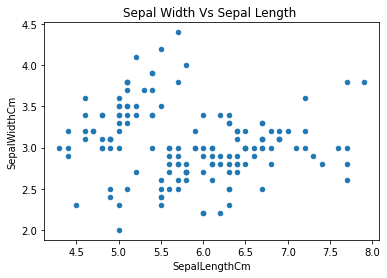

In [146]:
data.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',title='Sepal Width Vs Sepal Length ')

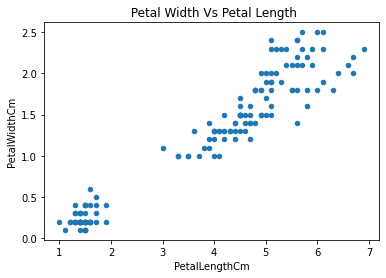

In [147]:
data.plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',title=' Petal Width Vs Petal Length')

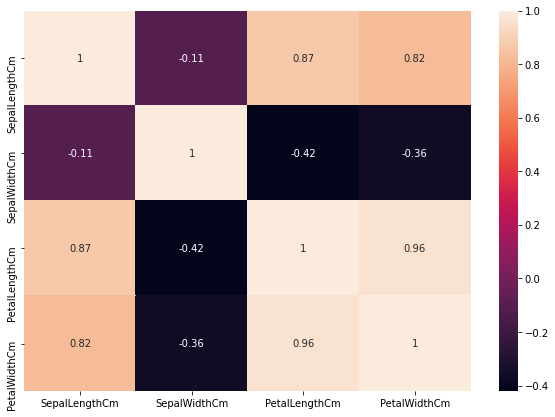

In [137]:
plt.figure(figsize=(10,7))
matrix=data.corr()
sns.heatmap(matrix,annot=True)

##**Preparing The Data**

In [138]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

##**Using Elbow Method To Find The Number Of Clusters**

Text(0.5, 1.0, 'ELBOW METHOD')

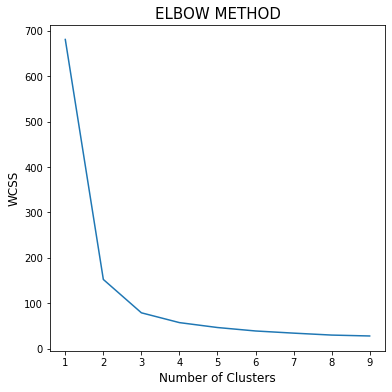

In [140]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,10),wcss)
plt.xlabel("Number of Clusters",size=12)
plt.ylabel("WCSS",size=12)
plt.title("ELBOW METHOD",size=15)

In [141]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++', random_state = 0)
y_pred = kmeans.fit_predict(x)

In [142]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


##**Visualising The Clusters**

[]

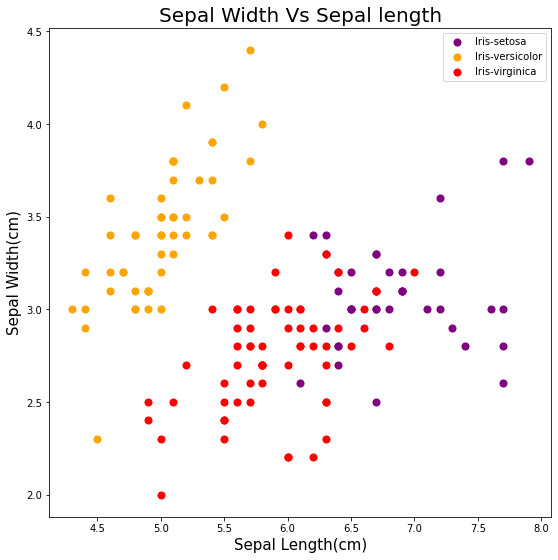

In [143]:
plt.figure(figsize=(9,9))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=50,color='purple',label = 'Iris-setosa')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=50,color='orange',label='Iris-versicolor')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=50,color='red',label= 'Iris-virginica')

plt.xlabel("Sepal Length(cm)",size=15)
plt.ylabel("Sepal Width(cm)",size=15)
plt.title("Sepal Width Vs Sepal length",size=20)
plt.legend()
plt.plot()



[]

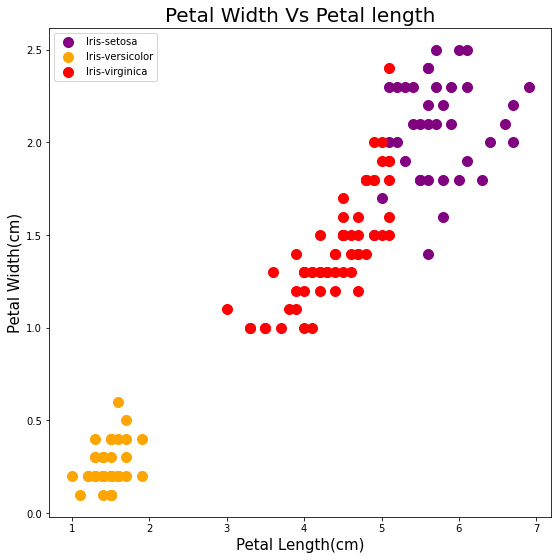

In [144]:
plt.figure(figsize=(9,9))
plt.scatter(x[y_pred==0,2],x[y_pred==0,3],s=100,color='purple',label = 'Iris-setosa')
plt.scatter(x[y_pred==1,2],x[y_pred==1,3],s=100,color='orange',label='Iris-versicolor')
plt.scatter(x[y_pred==2,2],x[y_pred==2,3],s=100,color='red',label= 'Iris-virginica')
plt.xlabel("Petal Length(cm)",size=15)
plt.ylabel("Petal Width(cm)",size=15)
plt.title("Petal Width Vs Petal length",size=20)
plt.legend()
plt.plot()